In [216]:
import pandas as pd

import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso, ElasticNet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv(r'C:\Users\User\Desktop\train.csv')
data1 = pd.read_csv(r'C:\Users\User\Desktop\test.csv')

data['totalSFT'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data1['totalSFT'] = data1['TotalBsmtSF'] + data1['1stFlrSF'] + data1['2ndFlrSF']


In [217]:
X = data[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','totalSFT']]
y = data['SalePrice']

#X[X.LotFrontage.isnull() == True] # 259
#X[X.LotArea.isnull() == True] #0
#X[X.OverallQual.isnull() == True] #0
#X[X.OverallCond.isnull() == True] #0
#X[X.YearBuilt.isnull() == True] #0
#X[X.YearRemodAdd.isnull() == True] #0
#X[X.TotalBsmtSF.isnull() == True] #0
#X[X['1stFlrSF'].isnull() == True] #0
#X[X['2ndFlrSF'].isnull() == True] #0
#y[y.isnull() == True]

In [218]:
X = data1[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','totalSFT']]


#X[X.LotFrontage.isnull() == True] # 227
#X[X.LotArea.isnull() == True] #0
#X[X.OverallQual.isnull() == True] #0
#X[X.OverallCond.isnull() == True] #0
#X[X.YearBuilt.isnull() == True] #0
#X[X.YearRemodAdd.isnull() == True] #0
#X[X.TotalBsmtSF.isnull() == True] #1
#X[X['1stFlrSF'].isnull() == True] #0
#X[X['2ndFlrSF'].isnull() == True] #0

In [219]:
display(len(data)) #1460
data = data.dropna(subset=['SalePrice','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF'])
display(len(data))
# LotFrontage is causing the nulls

1460

1460

In [220]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSFT
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,2567.048630
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,821.714421
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2009.500000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2474.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3004.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,11752.000000


In [274]:
X = data[['LotArea','OverallQual','OverallCond','YearBuilt','totalSFT','YearRemodAdd']]
y = data['SalePrice']

In [275]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

In [303]:
# Random Forest Model - Identify key features
rf_Model = RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True)
rf_Model.fit(X_train,y_train)
rf_Model.feature_importances_

array([0.24575816, 0.2619648 , 0.49227703])

In [305]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(n_estimators = 100, max_features='log2',bootstrap = True), X_train, y_train, cv=5, scoring='r2')
display(scores.mean())
display(scores.std())

0.7900943978922812

0.07434979767413391

In [296]:
#Lasso Regression
X = data[['OverallQual','YearBuilt','totalSFT']]
y = data['SalePrice']


X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

lassReg = Lasso()
lassReg = lassReg.fit(X_train,y_train)

scores = cross_val_score(lassReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())

0.7298996593926461

0.1319386875666775

In [189]:
#Submission for Kaggle
data1 = data1.fillna(data1.mean())
X = data1[['OverallQual','YearBuilt','totalSFT']]
#pd.DataFrame(lassReg.predict(X)).to_csv('Lasso_Model.csv')

In [295]:
#ElasticNet
X = data[['OverallQual','YearBuilt','totalSFT']]
y = data['SalePrice']


X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

elasReg = ElasticNet()
elasReg = elasReg.fit(X_train,y_train)
scores = cross_val_score(elasReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())

0.6975464950694039

0.15374460358358652

In [73]:
#Submission for Kaggle
data1 = data1.fillna(data1.mean())
X = data1[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF',]]
#pd.DataFrame(elasReg.predict(X)).to_csv('ElasticNet_Model.csv')

In [310]:
#Gradient Boost Regressor

#data = data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]

X = data[['OverallQual','YearBuilt','totalSFT']]
y = data['SalePrice']



from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)





X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

gradientReg = GradientBoostingRegressor(max_depth=3,n_estimators=100,learning_rate=.10,max_features='log2')
gradientReg = gradientReg.fit(X_train,y_train)

scores = cross_val_score(gradientReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())

0.7711074686824119

0.07071062953176675

In [193]:
#Submission for Kaggle

X = data1[['OverallQual','YearBuilt','totalSFT']]
X = my_imputer.fit_transform(X)
pd.DataFrame(gradientReg.predict(X)).to_csv('GradientBoost_Model.csv')

In [271]:
# Random Forest

X = data[['OverallQual','YearBuilt','totalSFT']]
y = data['SalePrice']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

randForestReg = RandomForestRegressor(n_estimators = 100, max_features='sqrt',bootstrap = True)


modelRFG = randForestReg.fit(X_train,y_train)
display(cross_val_score(modelRFG,X_test,y_test,cv=5,scoring='r2').mean())
display(cross_val_score(modelRFG,X_test,y_test,cv=5,scoring='r2').std())

0.7885956254906282

0.0603280302050427

In [272]:
#Submission for Kaggle

X = data1[['OverallQual','YearBuilt','totalSFT']]
X = my_imputer.fit_transform(X)
pd.DataFrame(modelRFG.predict(X)).to_csv('RFR_Model.csv')

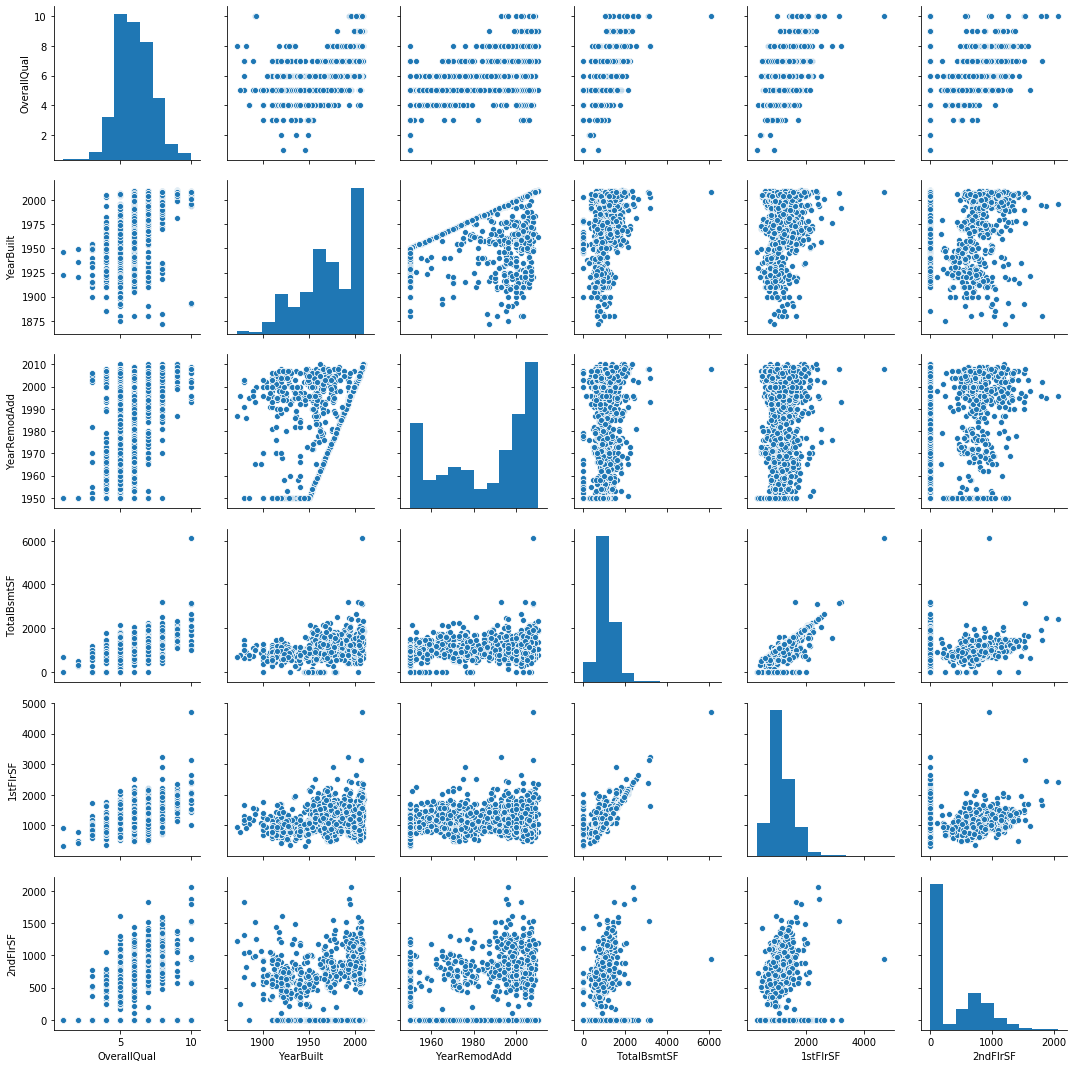

In [209]:
import seaborn as sns

sns.pairplot(X)

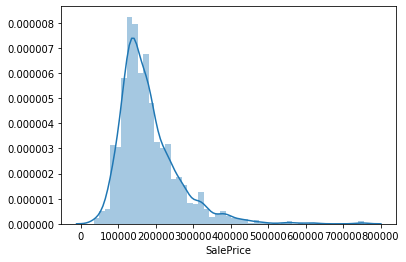

In [273]:
sns.distplot(y)

In [326]:
data = data[data['SalePrice']<380000]

#Gradient Boost Regressor

#data = data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]

X = data[['OverallQual','YearBuilt','totalSFT']]
y = data['SalePrice']



from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)





X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

gradientReg = GradientBoostingRegressor(max_depth=3,n_estimators=100,learning_rate=.10,max_features='log2')
gradientReg = gradientReg.fit(X_train,y_train)

scores = cross_val_score(gradientReg,X_test,y_test,cv=5,scoring='r2')
display(scores.mean())
display(scores.std())

0.7485876793611407

0.06393776932554233